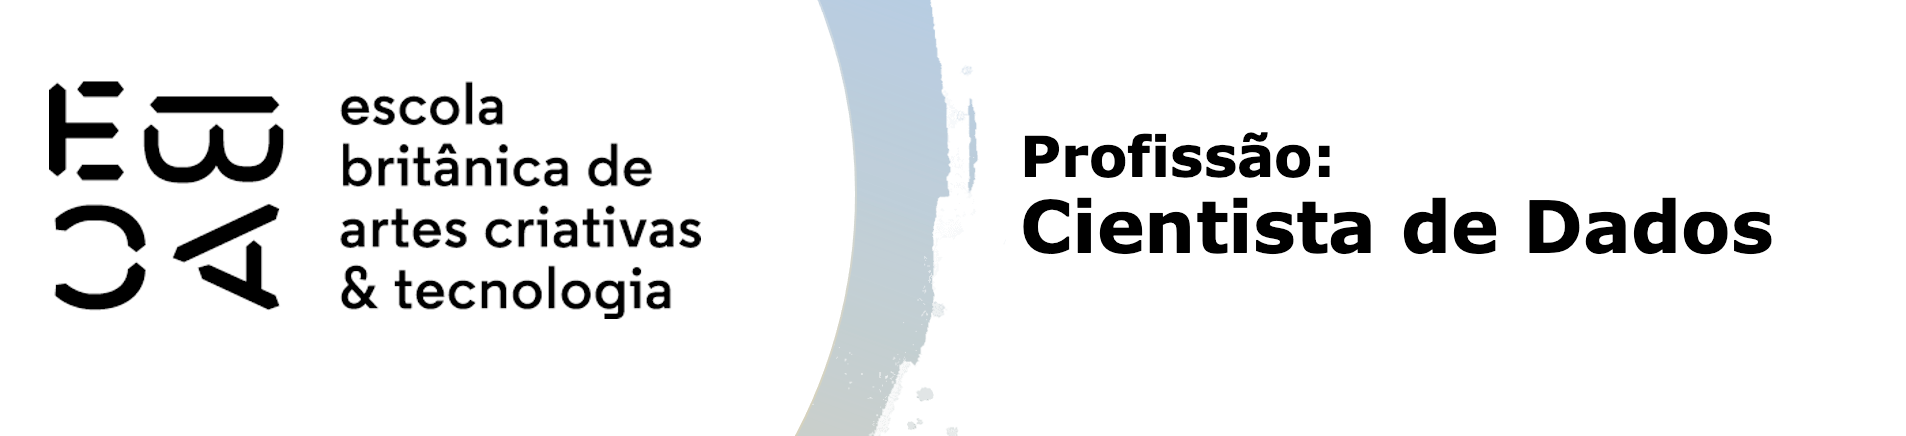

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/home/diego/Downloads/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 
             'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

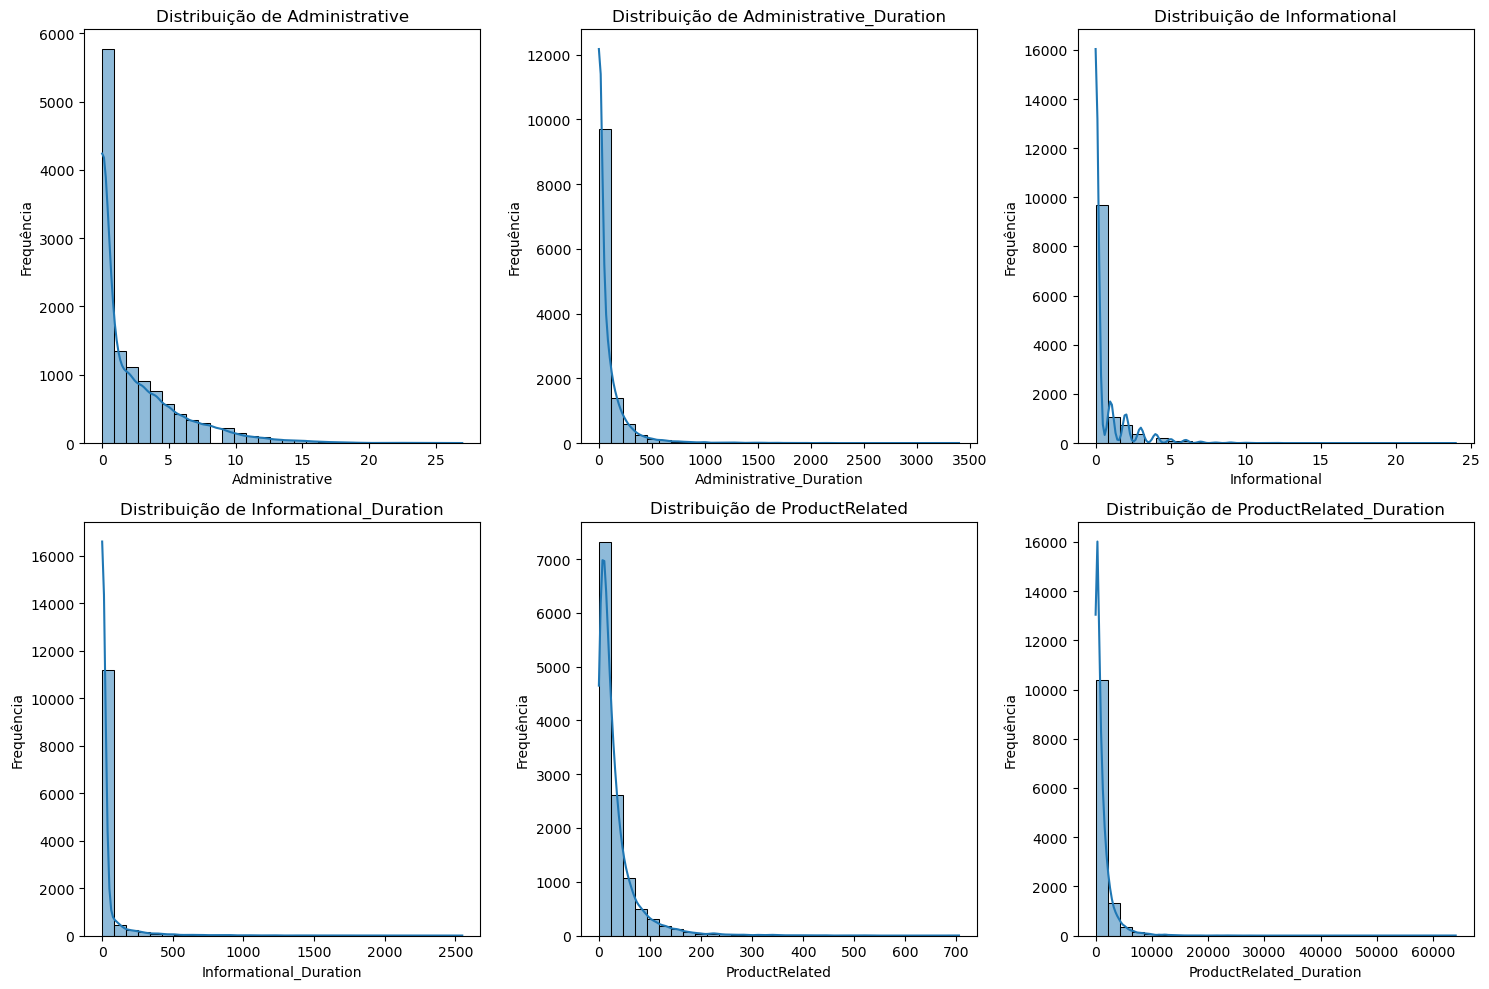

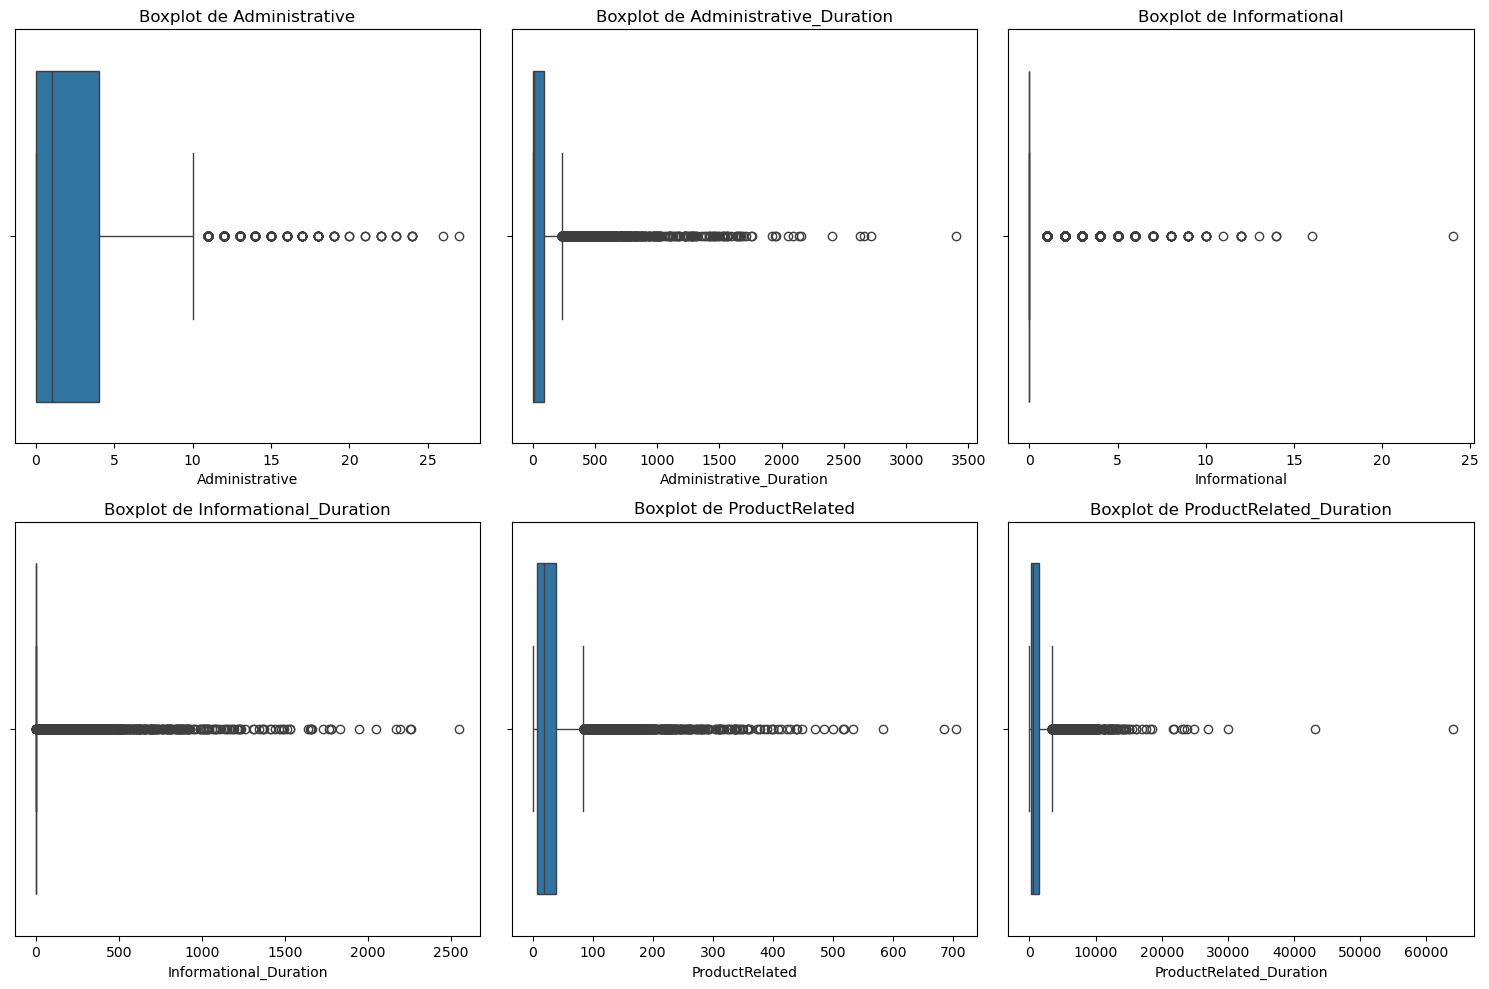

In [6]:
plt.figure(figsize=(15, 10))

for i, var in enumerate(variaveis):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- *Não há valores missing.*

In [8]:
# Tratamento de outliers
for var in variaveis:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Substituir outliers por limites inferiores/superiores
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])


In [9]:
# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[variaveis])

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

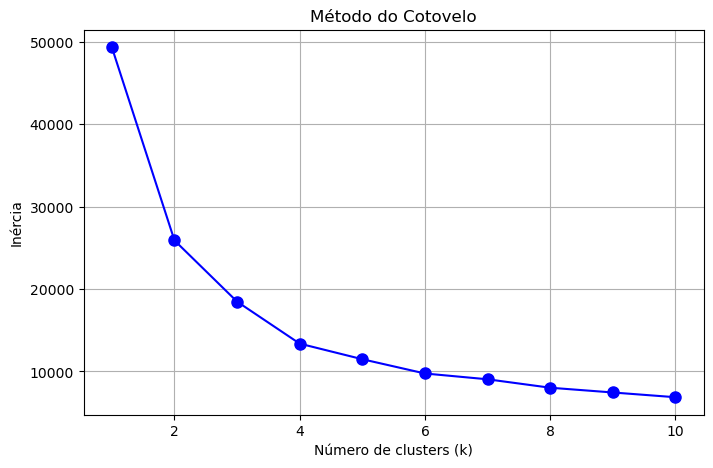

In [10]:
inercia = []
K = range(1, 11)

# Calcular a inércia para diferentes números de clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inercia.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K, inercia, 'bo-', markersize=8)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid()
plt.show()

- *Me parece que a quantidade ideal de grupos seria 4.*

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [11]:
# Avaliação para 4 grupos
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_4'] = kmeans_4.fit_predict(data_scaled)

In [12]:
# Análise descritiva para 4 grupos
print("Análise descritiva para 4 grupos:")
print(df.groupby('Cluster_4')[variaveis].mean())

Análise descritiva para 4 grupos:
           Administrative  Administrative_Duration  Informational  \
Cluster_4                                                           
0                1.433516                28.405278            0.0   
1                5.078179               153.806287            0.0   
2                7.660441               188.836892            0.0   
3                0.521987                10.032242            0.0   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_4                                                                   
0                             0.0       58.378571              2329.384129  
1                             0.0       22.222079               786.907055  
2                             0.0       71.364601              2759.667754  
3                             0.0       12.437893               411.280451  


In [13]:
# Avaliação para 5 grupos
kmeans_5 = KMeans(n_clusters=5, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(data_scaled)
print("\nAnálise descritiva para 5 grupos:")
print(df.groupby('Cluster_5')[variaveis].mean())


Análise descritiva para 5 grupos:
           Administrative  Administrative_Duration  Informational  \
Cluster_5                                                           
0                1.332543                26.450450            0.0   
1                3.183940                74.206035            0.0   
2                6.123354               198.361591            0.0   
3                0.196732                 2.982823            0.0   
4                7.572642               183.751269            0.0   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_5                                                                   
0                             0.0       59.574096              2385.537200  
1                             0.0       19.704482               655.623893  
2                             0.0       25.760222               957.420053  
3                             0.0       11.665889               387.359725  
4                  

In [14]:
# Avaliação para 3 grupos
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(data_scaled)

# Análise descritiva para 3 grupos
print("Análise descritiva para 3 grupos:")
print(df.groupby('Cluster_3')[variaveis].mean())

Análise descritiva para 3 grupos:
           Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                1.950347                40.489806            0.0   
1                0.803646                18.373465            0.0   
2                6.688819               188.234918            0.0   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_3                                                                   
0                             0.0       62.981313              2501.276377  
1                             0.0       13.279909               444.454850  
2                             0.0       41.556880              1566.558293  


In [15]:
from sklearn.metrics import silhouette_score

# Calcular o índice de silhueta para cada agrupamento
silhouette_3 = silhouette_score(data_scaled, df['Cluster_3'])
silhouette_4 = silhouette_score(data_scaled, df['Cluster_4'])
silhouette_5 = silhouette_score(data_scaled, df['Cluster_5'])

print(f"Índice de Silhueta para 3 clusters: {silhouette_3:.4f}")
print(f"Índice de Silhueta para 4 clusters: {silhouette_4:.4f}")
print(f"Índice de Silhueta para 5 clusters: {silhouette_5:.4f}")

Índice de Silhueta para 3 clusters: 0.4980
Índice de Silhueta para 4 clusters: 0.4890
Índice de Silhueta para 5 clusters: 0.4179


- *Olhando agora com a ajuda do silhouette score, o agrupamente de 3 parece ser o melhor entre eles. No metodo o cotovelo estava mais dificil de intentificar, mas agora ficou mais claro.*

In [16]:
nomes_cluster = {
    0: 'Informativos',
    1: 'Exploradores',
    2: 'Administrativos',
    3: 'Casuais'
}

# Rename Cluster_3 to Cluster_Final
df['Cluster_Final'] = df['Cluster_3']

df['nomes_cluster'] = df['Cluster_3'].map(nomes_cluster)
df[['Cluster_Final', 'nomes_cluster']].head()

,Cluster_Final,nomes_cluster
0,1,Exploradores
1,1,Exploradores
2,1,Exploradores
3,1,Exploradores
4,1,Exploradores


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [17]:
# Avaliação dos grupos
variaveis_aval = ['BounceRates', 'Revenue']

grupo_aval = df.groupby('Cluster_Final')[variaveis_aval].mean()

print(grupo_aval)

               BounceRates   Revenue
Cluster_Final                       
0                 0.007358  0.230646
1                 0.030676  0.113685
2                 0.006852  0.225958


In [18]:
# Identificar o grupo com maior propensão a compra
propensos = grupo_aval['Revenue'].idxmax()
print(f"\nO grupo mais propenso à compra é o Cluster {propensos}.")


O grupo mais propenso à compra é o Cluster 0.
